In [1]:
from datasets import load_dataset

dataset = load_dataset('csv', data_files={'train': '../sst5/train_sst5.csv', 'val' : '../sst5/val_sst5.csv', 'test': '../sst5/test_sst5.csv'})

Using custom data configuration default-1ec86d73e728f420
Reusing dataset csv (C:\Users\AR88750\.cache\huggingface\datasets\csv\default-1ec86d73e728f420\0.0.0\bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a)


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
train_ds, val_ds, test_ds = dataset["train"], dataset["val"], dataset["test"]

In [3]:
train_ds

Dataset({
    features: ['sentence', 'label'],
    num_rows: 8544
})

In [4]:
val_ds

Dataset({
    features: ['sentence', 'label'],
    num_rows: 1101
})

In [5]:
test_ds

Dataset({
    features: ['sentence', 'label'],
    num_rows: 2210
})

In [6]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")

In [7]:
def tokenize_function(examples):
    return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length = 512)

tokenized_train_ds = train_ds.map(tokenize_function, batched=True)
tokenized_val_ds = val_ds.map(tokenize_function, batched=True)
tokenized_test_ds = test_ds.map(tokenize_function, batched=True)

Loading cached processed dataset at C:\Users\AR88750\.cache\huggingface\datasets\csv\default-1ec86d73e728f420\0.0.0\bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a\cache-b7179f14f60e408e.arrow
Loading cached processed dataset at C:\Users\AR88750\.cache\huggingface\datasets\csv\default-1ec86d73e728f420\0.0.0\bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a\cache-7f4a9379add18320.arrow


  0%|          | 0/3 [00:00<?, ?ba/s]

In [8]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=5)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [9]:
from transformers import TrainingArguments

training_args = TrainingArguments("trainer", evaluation_strategy="epoch", num_train_epochs=5, learning_rate = 5e-05)

In [10]:
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_steps=None,
evaluation_strategy=IntervalStrategy.EPOCH,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
hub_model_id=None,
hub_strategy=HubStrategy.EVERY_SAVE,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
label_names=None,
label_smoothing_factor=0.0,
learning_rate=5e-05,
length_column_name=length,
load_best_model_at_end=False,
local_rank=-1,
log_level=-1,
log_level_replica=-1,
log_on_each_node=True,
logging_dir=trainer\runs\Nov18_18-01-45_logti-a3446-15,
logging_first_step=False,
logging_nan_inf_filter=True,
logging_

In [11]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [12]:
import torch

torch._C._cuda_getDeviceCount()

1

In [13]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_val_ds,
)

trainer.train()

The following columns in the training set  don't have a corresponding argument in `XLNetForSequenceClassification.forward` and have been ignored: sentence.
***** Running training *****
  Num examples = 8544
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 5340


Epoch,Training Loss,Validation Loss
1,1.534000,1.520939
2,1.372600,1.283294
3,1.214900,1.276195
4,1.023700,1.292266
5,0.835700,1.410696


Saving model checkpoint to trainer\checkpoint-500
Configuration saved in trainer\checkpoint-500\config.json
Model weights saved in trainer\checkpoint-500\pytorch_model.bin
Saving model checkpoint to trainer\checkpoint-1000
Configuration saved in trainer\checkpoint-1000\config.json
Model weights saved in trainer\checkpoint-1000\pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `XLNetForSequenceClassification.forward` and have been ignored: sentence.
***** Running Evaluation *****
  Num examples = 1101
  Batch size = 8
Saving model checkpoint to trainer\checkpoint-1500
Configuration saved in trainer\checkpoint-1500\config.json
Model weights saved in trainer\checkpoint-1500\pytorch_model.bin
Saving model checkpoint to trainer\checkpoint-2000
Configuration saved in trainer\checkpoint-2000\config.json
Model weights saved in trainer\checkpoint-2000\pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding arg

TrainOutput(global_step=5340, training_loss=1.2089014346233469, metrics={'train_runtime': 5517.7723, 'train_samples_per_second': 7.742, 'train_steps_per_second': 0.968, 'total_flos': 1.217038830354432e+16, 'train_loss': 1.2089014346233469, 'epoch': 5.0})

In [14]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_ds,
    eval_dataset=tokenized_test_ds,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `XLNetForSequenceClassification.forward` and have been ignored: sentence.
***** Running Evaluation *****
  Num examples = 2210
  Batch size = 8


{'eval_loss': 1.2674388885498047,
 'eval_accuracy': 0.49638009049773757,
 'eval_runtime': 141.8948,
 'eval_samples_per_second': 15.575,
 'eval_steps_per_second': 1.952}

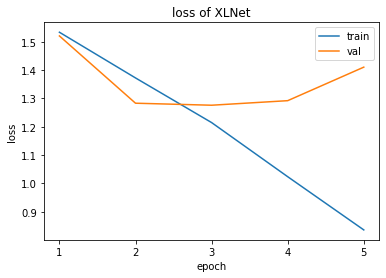

In [15]:
import matplotlib.pyplot as plt

loss_train = [1.534000, 1.372600, 1.214900, 1.023700, 0.835700]
loss_val = [1.520939, 1.283294, 1.276195, 1.292266, 1.410696]

plt.plot(loss_train)
plt.plot(loss_val)
plt.title("loss of XLNet")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xticks(np.arange(len(loss_train)), np.arange(1, len(loss_val)+1))
plt.legend(["train", "val"])
plt.show()

In [13]:
model

XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (1): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `XLNetForSequenceClassification.forward` and have been ignored: text.
***** Running training *****
  Num examples = 25000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 9375


Step,Training Loss
500,0.384200
1000,0.360500
1500,0.339900
2000,0.346800


Saving model checkpoint to test_trainer/checkpoint-500
Configuration saved in test_trainer/checkpoint-500/config.json
Model weights saved in test_trainer/checkpoint-500/pytorch_model.bin
Saving model checkpoint to test_trainer/checkpoint-1000
Configuration saved in test_trainer/checkpoint-1000/config.json
Model weights saved in test_trainer/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to test_trainer/checkpoint-1500
Configuration saved in test_trainer/checkpoint-1500/config.json
Model weights saved in test_trainer/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to test_trainer/checkpoint-2000
Configuration saved in test_trainer/checkpoint-2000/config.json
Model weights saved in test_trainer/checkpoint-2000/pytorch_model.bin


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=full_train_dataset,
    eval_dataset=full_eval_dataset,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

In [ ]:
model.save_pretrained("xlnet_imdb_model")